In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
import imutils
from PIL import Image
#mpl.rcParams['figure.dpi'] = 200

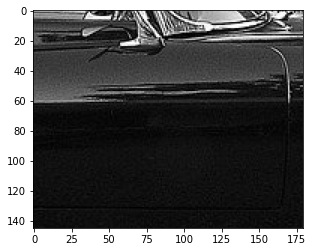

In [2]:
url = 'https://courses.openedu.ru/assets/courseware/v1/3bd6f864faf5f5574141873f858966e7/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/car-4445171_1280.jpg'
image = cv2.cvtColor(imutils.url_to_image(url), cv2.COLOR_BGR2GRAY)
crop = image[333:478, 567:747]
path = r'C:\Users\Victor\Downloads\crop.jpg'
cv2.imwrite(path, image)
plt.imshow(crop, cmap = 'gray');

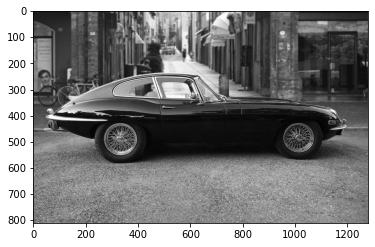

In [3]:
plt.imshow(image, cmap = 'gray');

In [4]:
crop_heigth, crop_width = crop.shape
print(crop_width, crop_heigth)
print(image.shape)

180 145
(810, 1280)


In [5]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(crop, None) 
kp2, des2 = sift.detectAndCompute(image, None) 

bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True) 
matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance) 
print('Matches rate ', len(matches))
for i in range(0,6): #let's display the first 3 
    print('Distance ',matches[i].distance,'Index KP in image ',matches[i].trainIdx,'Index KP in crop ', matches[i].queryIdx)
#trainIdx содержит координаты ключевых точек на исходном изображении. QueryIdx на обрезанном

Matches rate  40
Distance  0.0 Index KP in image  2174 Index KP in crop  2
Distance  0.0 Index KP in image  2213 Index KP in crop  5
Distance  0.0 Index KP in image  2214 Index KP in crop  6
Distance  0.0 Index KP in image  2226 Index KP in crop  7
Distance  0.0 Index KP in image  2236 Index KP in crop  8
Distance  0.0 Index KP in image  2243 Index KP in crop  9


In [6]:
print(kp1[2].pt)
width, heigth = kp2[2174].pt
print("For imput image KP0.pt: {0:.0f},{1:.0f}".format(width , heigth))

(48.97333908081055, 57.565345764160156)
For imput image KP0.pt: 616,391


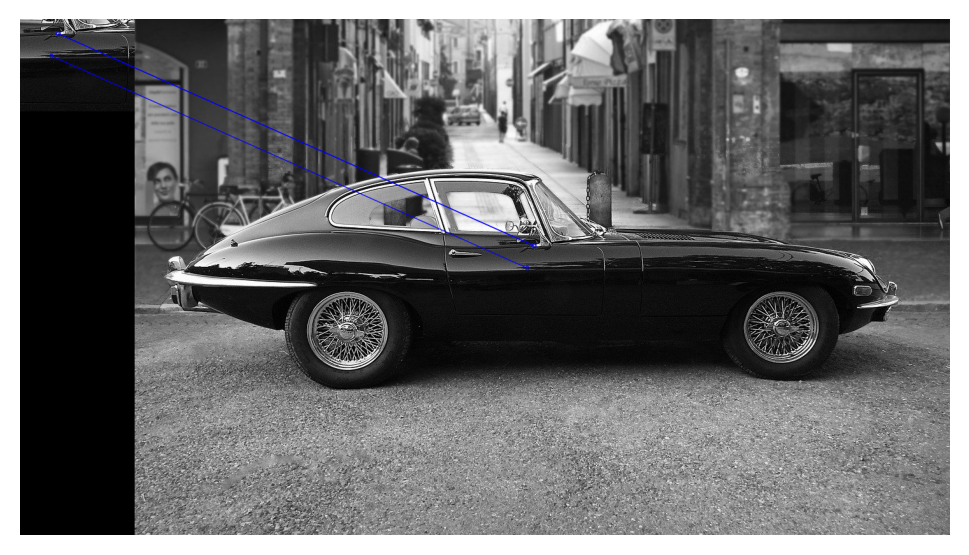

In [7]:
matching_result = cv2.drawMatches(crop, kp1, image, kp2, matches[:3], None, [255,0,0], flags=2)
mpl.rcParams['figure.dpi'] = 200
plt.axis('off')
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB));

In [14]:
img_BGR = imutils.url_to_image(url)
image1 = img_BGR
#image1[371:411, 586:636, 0] = 1
print("test", img_BGR[391, 616])
#plt.imshow(cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB));
#plt.imshow(img_BGR)
#image1.shape

test [5 1 0]


In [17]:
print(f"Test {3.565:.2f}")

Test 3.56
